In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from MLalgorithms.linear_regresson import LinearRegression

В случае линейной регрессии в качестве функционала ошибки используется среднеквадратичная ошибка.
$$
L(y,w) = \sum_{i=1}^{N}\left(y_i - \hat{y_i}\right)^2
$$

Функционал ошибки нужно минимизировать. На практике, для того чтобы найти минимум функции, используют градиентный спуск.
Смысл его работы следущий. На каждом шаге находим градиент функции потерь по весам, домножаем на скорость обучения  $\eta$ - (шаг градиентного спуска)  и вычитаем полученные значения из текущих значений весов при признаках. Далее обновляем веса полученным значением.

"Маленькие шажки", которыми мы двигаемся к оптимальному решению в виде формулы выглядят следующим образом:
$$
w^{k+1} = w^k - \eta\nabla L(w)
$$
Переменная $\eta$ в формуле - т.н. *шаг градиентного спуска*.

Где $\nabla L(w)$ - вектор градиента функции. Этот вектор обладает следующими свойствами: 

* имеет размерность вектора параметров. Если два параметра $[w_1,w_0]$ - в векторе будет два элемента
* элемент градиента под номером $i$ - это частная производная функции потерь $L(y, w)$ по параметру $w_i$

Чтобы реализовать алгоритм градиентного спуска, выпишем частные прозводные функции качества линейной регрессии $L$ для параметров $\overline{w} = [w_1,\ldots,w_m]$ в простейшем случае $n=1$, то есть для одного обучающего примера (одного наблюдения):
$$
\left\{
\begin{array}{cc}
\frac{\partial L}{\partial w_0} = 2\cdot(-1)\cdot1\cdot (y_1 - (w_0x_0^1 + \ldots+w_mx_m^1)) &\\
\frac{\partial L}{\partial w_k} = 2\cdot(-1)\cdot x_1^1 \cdot (y_1 - (w_0x_0^1 + \ldots+w_mx_m^1)) &  k\neq 0\\
\end{array}
\right.
$$

В формуле все обозначения вам известны

* $w_0, \ldots, w_m$ - коэффициенты линейной регрессиии $m$ - количество фичей
* $x_0, \ldots, x_m$ - фичи.

Регуляризованный градиент будет выглядеть следущим образом 

Формула поменяется следующим образом:
$$
\left\{
\begin{array}{cc}
\frac{\partial L}{\partial w_0} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} 1\cdot \left(y_i - \sum_{j=1}^{m}w_jx_j^i\right) + \lambda\cdot 2\cdot w_0&\\
\frac{\partial L}{\partial w_k} = \frac{2}{n}\cdot(-1)\cdot \sum_{i=1}^{n} x_k^i \cdot\left(y_i - \sum_{j=1}^{m}w_jx_j^i\right) + \lambda\cdot 2\cdot w_k& k\neq 0 \\
\end{array}
\right.
$$

In [3]:
lr = LinearRegression()

## Далее я обучу реализованный алгоритм на простом наборе данных из sklearn - "load_boston", предварительно его маштабировав. Сами же данные будут разбиты не на train, test, validation, а для простоты на train и test. 

In [4]:
data = load_boston()
X = data['data']
y = data['target']
# Обязательно маштабируем
std = StandardScaler()
X = std.fit_transform(X)
# Делим на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 17)

In [5]:
# Обучаем алгорим и сохраняем историю изменений MSE в history
history = lr.fit(X_train, y_train)

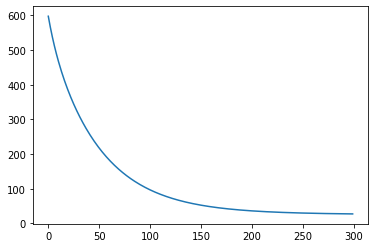

In [6]:
# Визуализируем history
plt.plot(history)

In [7]:
history[-1]

27.180031186899637

In [8]:
y_pred = lr.predict(X_test)

In [9]:
from sklearn.metrics import mean_squared_error

In [10]:
mean_squared_error(y_test, y_pred)

20.531301198101513